In [1]:
import numpy as np, pandas as pd, yfinance as yf, matplotlib.pyplot as plt

Call estándar: 20.2053
Call con antitéticas: 20.9821
Put estándar: 31.8291
Put con antitéticas: 31.0822


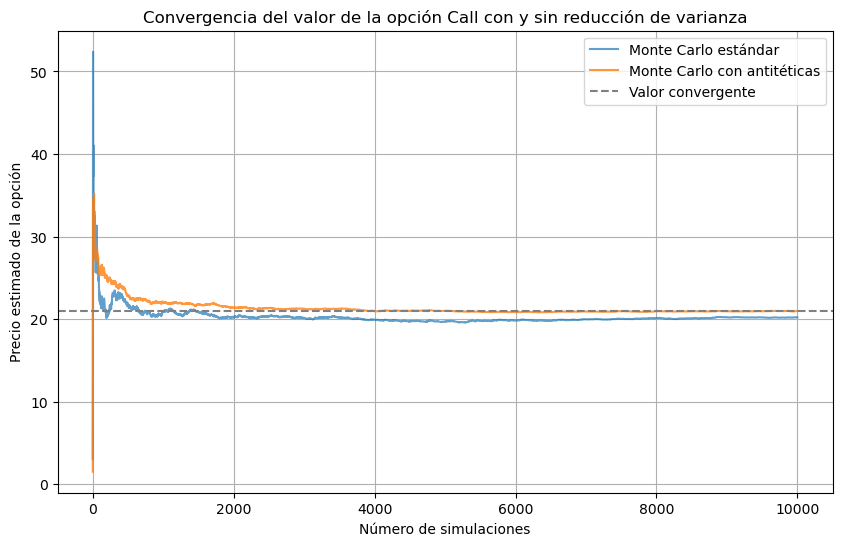

In [13]:
# Parámetros base 
ticker = 'SPY'
data = yf.download(ticker, start='2022-01-01', end='2025-10-15', auto_adjust=False, progress=False)['Close']['SPY']
daily_returns = data.pct_change().dropna()
sigma = daily_returns.std() * np.sqrt(252)
S0 = data.iloc[-1]
r = 0.0411
T = 100 / 365
K = 680
num_simulations = 10000

# Simulación Monte Carlo estándar
Z = np.random.normal(0, 1, num_simulations)
St = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
call_payoff = np.maximum(St - K, 0)
put_payoff = np.maximum(K - St, 0)
call_value_std = np.exp(-r * T) * np.mean(call_payoff)
put_value_std = np.exp(-r * T) * np.mean(put_payoff)

# Simulación con variables antitéticas
Z_antithetic = -Z
St_antithetic = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z_antithetic)
call_payoff_antithetic = np.maximum(St_antithetic - K, 0)
put_payoff_antithetic = np.maximum(K - St_antithetic, 0)

# Promedio entre original y antitético (reducción de varianza)
call_avg = 0.5 * (call_payoff + call_payoff_antithetic)
put_avg = 0.5 * (put_payoff + put_payoff_antithetic)
call_value_antithetic = np.exp(-r * T) * np.mean(call_avg)
put_value_antithetic = np.exp(-r * T) * np.mean(put_avg)

# Cálculo progresivo para comparar convergencia
call_cum_std = np.exp(-r * T) * np.cumsum(call_payoff) / np.arange(1, num_simulations + 1)
call_cum_anti = np.exp(-r * T) * np.cumsum(call_avg) / np.arange(1, num_simulations + 1)

# Resultados numéricos
print(f"Call estándar: {call_value_std:.4f}")
print(f"Call con antitéticas: {call_value_antithetic:.4f}")
print(f"Put estándar: {put_value_std:.4f}")
print(f"Put con antitéticas: {put_value_antithetic:.4f}")

# Gráfico de convergencia
plt.figure(figsize=(10,6))
plt.plot(call_cum_std, label='Monte Carlo estándar', alpha=0.7)
plt.plot(call_cum_anti, label='Monte Carlo con antitéticas', alpha=0.8)
plt.axhline(y=call_value_antithetic, color='gray', linestyle='--', label='Valor convergente')
plt.title("Convergencia del valor de la opción Call con y sin reducción de varianza")
plt.xlabel("Número de simulaciones")
plt.ylabel("Precio estimado de la opción")
plt.legend()
plt.grid(True)
plt.show()